In [42]:
import seaborn as sns
# ^^^ pyforest auto-imports - don't write above this line
# !pip install jupyterthemes
#!jt -t monokai
#!jt -

In [43]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.simplefilter(action='ignore')

basePath='/Users/40101290/Documents/Python_codes'
trainDataFilePath = basePath+'/train.csv'
testDataFilePath = basePath+'/test.csv'

train = pd.read_csv(trainDataFilePath)
test = pd.read_csv(testDataFilePath)

In [44]:
# VARIABLE DESCRIPTIONS:
# survival        Survival
#                 (0 = No; 1 = Yes)
# pclass          Passenger Class
#                 (1 = 1st; 2 = 2nd; 3 = 3rd)
# name            Name
# sex             Sex
# age             Age
# sibsp           Number of Siblings/Spouses Aboard
# parch           Number of Parents/Children Aboard
# ticket          Ticket Number
# fare            Passenger Fare
# cabin           Cabin
# embarked        Port of Embarkation
#                 (C = Cherbourg; Q = Queenstown; S = Southampton)

In [45]:
#Data Exploration

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [46]:
#Data Exploration

print("The shape of the data is : {}".format(train.shape))

The shape of the data is : (891, 12)


In [47]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [48]:
# Statistical Summary of Continuous Variables:

train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [49]:
#Identify numeric and categorical variables
numeric_data=train.select_dtypes(include=np.number)
numeric_cols=numeric_data.columns
print("Numeric features :")
print(numeric_data.head())
print("====="*20)
print(train[numeric_cols].describe())

Numeric features :
   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0            1         0       3  22.0      1      0   7.2500
1            2         1       1  38.0      1      0  71.2833
2            3         1       3  26.0      0      0   7.9250
3            4         1       1  35.0      1      0  53.1000
4            5         0       3  35.0      0      0   8.0500
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.0

In [50]:
#Categorical Variables
categorical_data=train.select_dtypes(exclude=np.number)
categorical_cols=train.columns
print("Categorical features :")
print(categorical_data.head())
print("===="*20)

Categorical features :
                                                Name     Sex  \
0                            Braund, Mr. Owen Harris    male   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   
2                             Heikkinen, Miss. Laina  female   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   
4                           Allen, Mr. William Henry    male   

             Ticket Cabin Embarked  
0         A/5 21171   NaN        S  
1          PC 17599   C85        C  
2  STON/O2. 3101282   NaN        S  
3            113803  C123        S  
4            373450   NaN        S  


In [51]:
#Check no of missing values in each feature
#Find the no of missing values and arrange them in descending order

total=train.isnull().sum().sort_values(ascending=False)

In [52]:
#Converting the missing values into percentage
percent=(train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)

In [53]:
#Concatenate two dataframes
missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
print(missing_data)

             Total   Percent
Cabin          687  0.771044
Age            177  0.198653
Embarked         2  0.002245
Fare             0  0.000000
Ticket           0  0.000000
Parch            0  0.000000
SibSp            0  0.000000
Sex              0  0.000000
Name             0  0.000000
Pclass           0  0.000000
Survived         0  0.000000
PassengerId      0  0.000000


In [54]:
#Dropping values having more than 60 %
dataframe=train.drop((missing_data[missing_data['Percent'] > 0.6]).index,axis=1)
print(dataframe.isnull().sum().sort_values(ascending=False))

Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64


In [55]:
#Code to mput missing values with mean or median
nulls=pd.DataFrame(dataframe.isnull().sum().sort_values(ascending=False))
nulls=nulls[nulls>0]
nulls.columns=['Null Count']
nulls.index.name="Feature"
print(nulls)

             Null Count
Feature                
Age               177.0
Embarked            2.0
Fare                NaN
Ticket              NaN
Parch               NaN
SibSp               NaN
Sex                 NaN
Name                NaN
Pclass              NaN
Survived            NaN
PassengerId         NaN


In [56]:
#Age in Imputed
# for column in nulls[nulls['Null Count']==177].index:
#     dataframe[column].fillna(dataframe[column].median(),inplace=True)
# print(dataframe.describe())

In [57]:
dataframe.select_dtypes(include=np.number).columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [58]:
#Check for class imbalance(0=NO,Yes=1)
class_values=(dataframe['Survived'].value_counts()/dataframe['Survived'].value_counts().sum())*100
print(class_values)

0    61.616162
1    38.383838
Name: Survived, dtype: float64


In [59]:
# Detect outliers in the continuous columns

cols = list(dataframe)
outliers = pd.DataFrame(columns=['Feature', 'Number of Outliers'])

for column in cols:  # Iterate through each feature
    if column in dataframe.select_dtypes(include=np.number).columns:
        q1 = dataframe[column].quantile(0.25)
        q3 = dataframe[column].quantile(0.75)
        iqr = q3 - q1
        fence_low = q1 - (1.5 * iqr)
        fence_high = q3 + (1.5 * iqr)

        # finding the number of outliers using 'and(|) condition.
        total_outlier = dataframe[(dataframe[column] < fence_low) |
                                  (dataframe[column] > fence_high)].shape[0]
        outliers = outliers.append(
            {
                'Feature': column,
                'Number of Outliers': total_outlier
            },
            ignore_index=True)
outliers

,Feature,Number of Outliers
0,PassengerId,0
1,Survived,0
2,Pclass,0
3,Age,11
4,SibSp,46
5,Parch,213
6,Fare,116


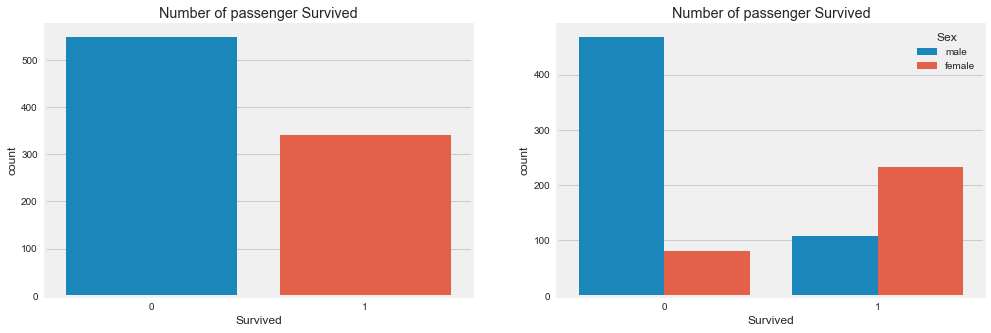

In [60]:
#!pip install jupyterthemes
from jupyterthemes import jtplot
#!jt -t solarizedl
#jtplot.style(theme="solarizedl",context="poster",fscale=1,spines=True,ticks=False,figsize=(6,4.5))
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(train.Survived)
plt.title('Number of passenger Survived');

plt.subplot(1,2,2)
sns.countplot(x="Survived", hue="Sex", data=train)
plt.title('Number of passenger Survived');

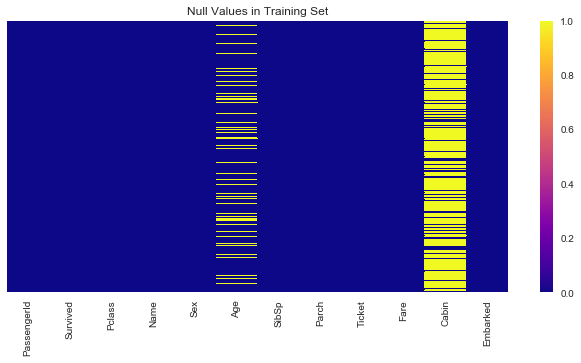

In [61]:
plt.style.use('seaborn')
plt.figure(figsize=(10,5))
sns.heatmap(train.isnull(), yticklabels = False, cmap='plasma')
plt.title('Null Values in Training Set');

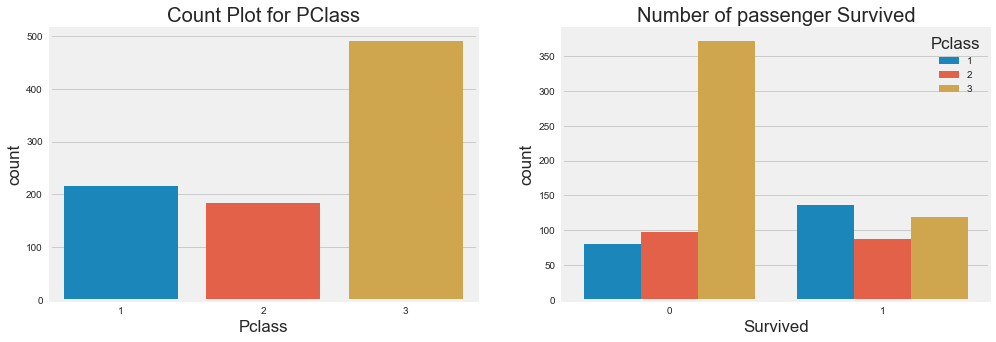

In [62]:
#Lets analyse Pclass
plt.figure(figsize=(15,5))
plt.style.use('fivethirtyeight')

plt.subplot(1,2,1)
sns.countplot(train['Pclass'])
plt.title('Count Plot for PClass');

plt.subplot(1,2,2)
sns.countplot(x="Survived", hue="Pclass", data=train)
plt.title('Number of passenger Survived');

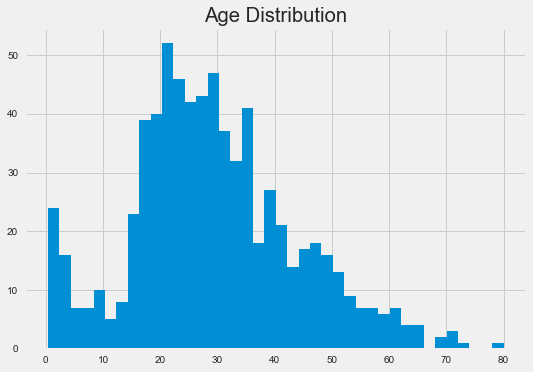

In [63]:
train['Age'].hist(bins=40)
plt.title('Age Distribution');

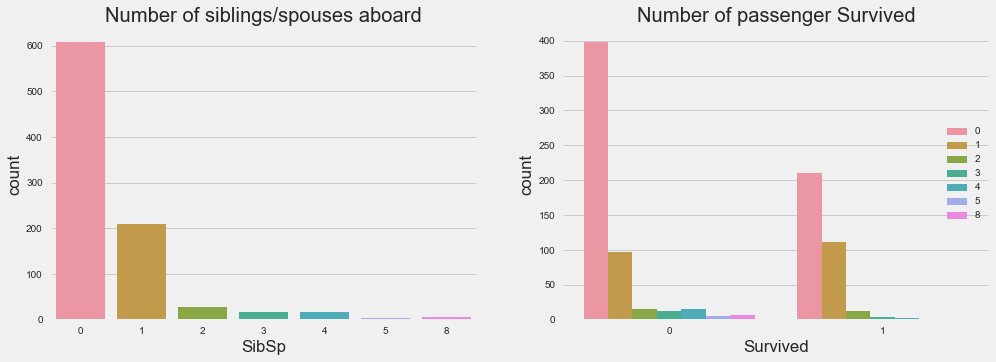

In [64]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(train['SibSp'])
plt.title('Number of siblings/spouses aboard');

plt.subplot(1,2,2)
sns.countplot(x="Survived", hue="SibSp", data=train)
plt.legend(loc='right')
plt.title('Number of passenger Survived');
#Looks like single person Non-survived count is almost double than survived, while others have 50-50 % ratio

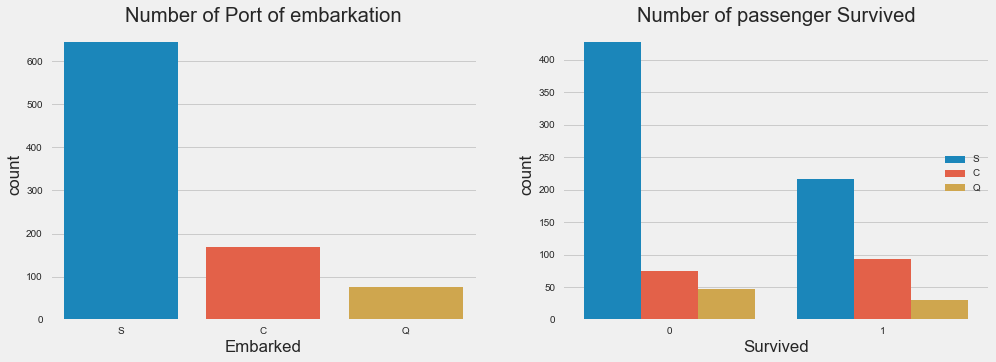

In [65]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(train['Embarked'])
plt.title('Number of Port of embarkation');

plt.subplot(1,2,2)
sns.countplot(x="Survived", hue="Embarked", data=train)
plt.legend(loc='right')
plt.title('Number of passenger Survived');

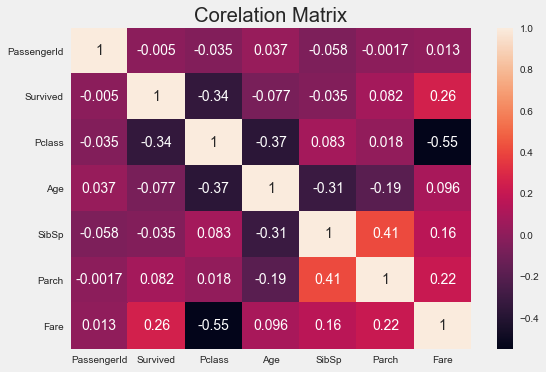

In [66]:
sns.heatmap(train.corr(), annot=True)
plt.title('Corelation Matrix');

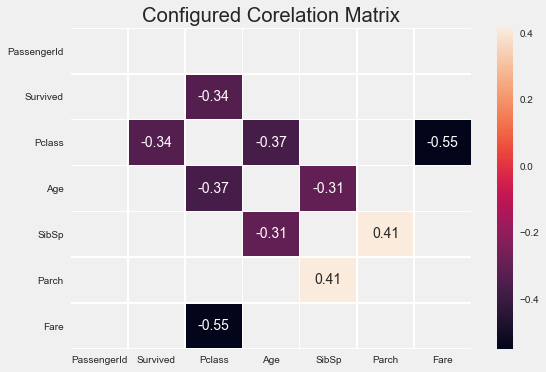

In [67]:
corr = train.corr()
sns.heatmap(corr[((corr >= 0.3) | (corr <= -0.3)) & (corr != 1)], annot=True, linewidths=.5, fmt= '.2f')
plt.title('Configured Corelation Matrix');

In [68]:
#Pclass and age, as they had max relation in the entire set we are going to replace missing age values with median age calculated per class
train.loc[train.Age.isnull(), 'Age'] = train.groupby("Pclass").Age.transform('median')

In [69]:
from statistics import mode
#As maximum values in train set is S let's replace it with the null values
train['Embarked'] = train['Embarked'].fillna(mode(train['Embarked']))

In [70]:
#corr(Fare, Pclass) is the highest correlation in absolute numbers for 'Fare', so we'll use Pclass again to impute the missing values!
train['Fare']  = train.groupby("Pclass")['Fare'].transform(lambda x: x.fillna(x.median()))

In [71]:
def clean_cabin(data):
    # Fill na values with 'Unknown' or simply 'U'
    data['Cabin'].fillna('U', inplace=True)
    data['Cabin'] = data['Cabin'].map(lambda x: x[0])
clean_cabin(train)

In [72]:
train['Cabin'].unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [73]:
#One hot encoding
encoder = OneHotEncoder()
temp = pd.DataFrame(encoder.fit_transform(train[['Embarked']]).toarray(), columns=['S', 'C', 'Q'])
train = train.join(temp)
train.drop(columns='Embarked', inplace=True)

In [74]:
#One hot encoding
encoder = OneHotEncoder()
temp = pd.DataFrame(encoder.fit_transform(train[['Cabin']]).toarray(), columns=['U', 'CA', 'E', 'G', 'D', 'A', 'B', 'F', 'T'])
train = train.join(temp)
train.drop(columns='Cabin', inplace=True)

In [75]:
train['IsMinor']=np.where(train['Age']<=16, 1, 0)

In [76]:
## Create categorical variable for traveling alone
train['TravelAlone']=np.where((train["SibSp"]+train["Parch"])>0, 0, 1)
train["Family"] = train["SibSp"] + train["Parch"]

In [77]:
#Convert the categorical variables into integers

train["Sex"][train["Sex"] == "male"] = 0
train["Sex"][train["Sex"] == "female"] = 1

In [78]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,E,G,D,A,B,F,T,IsMinor,TravelAlone,Family
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0


In [79]:
train = train.drop(['SibSp', 'Parch', 'Ticket','Name'], axis = 1)
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'S', 'C',
       'Q', 'U', 'CA', 'E', 'G', 'D', 'A', 'B', 'F', 'T', 'IsMinor',
       'TravelAlone', 'Family'],
      dtype='object')

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

cols = ['Pclass', 'Sex', 'Age', 'Fare', 'S', 'C',
       'Q', 'U', 'CA', 'E', 'G', 'D', 'A', 'B', 'F', 'T', 'IsMinor',
       'TravelAlone', 'Family'] 
X = train[cols]
y = train['Survived']
# Build a logreg and compute the feature importances
model = LogisticRegression()
# create the RFE model and select 8 attributes
rfe = RFE(model,8)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['Pclass', 'Sex', 'Q', 'G', 'D', 'A', 'B', 'IsMinor']


Optimal number of features: 18
Selected features: ['Pclass', 'Sex', 'Age', 'S', 'C', 'Q', 'U', 'CA', 'E', 'G', 'D', 'A', 'B', 'F', 'T', 'IsMinor', 'TravelAlone', 'Family']


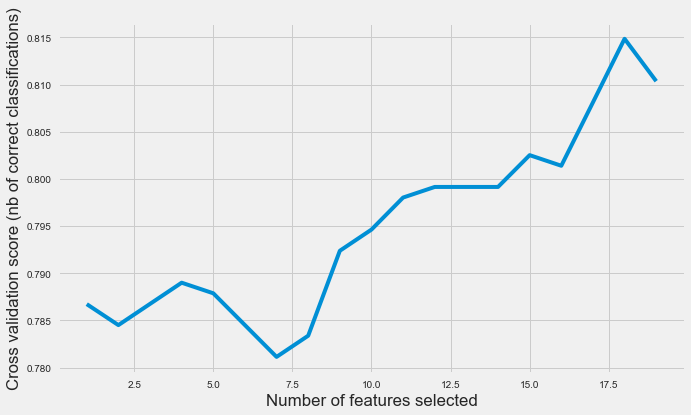

In [81]:
from sklearn.feature_selection import RFECV
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

['Pclass', 'Sex', 'Q', 'G', 'D', 'A', 'B', 'IsMinor', 'Survived']
Index(['Pclass', 'Sex', 'Q', 'G', 'D', 'A', 'B', 'IsMinor', 'Survived'], dtype='object')


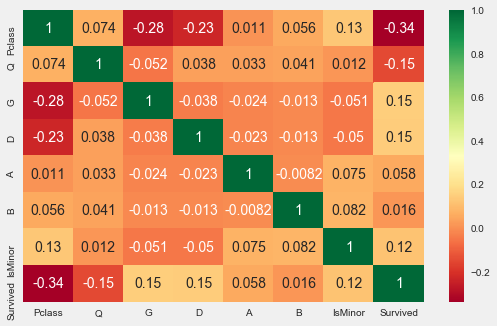

In [82]:

#All features =['Pclass', 'Sex', 'Age', 'S', 'C', 'Q', 'U', 'CA', 'E', 'G', 'D', 'A', 'B', 'F', 'T', 'IsMinor', 'TravelAlone', 'Family']
Selected_features=list(X.columns[rfe.support_])
Selected_features.append('Survived')
print(Selected_features)
final_train=train[Selected_features]
print(final_train.columns)
plt.subplots(figsize=(8, 5))
sns.heatmap(final_train.corr(), annot=True, cmap="RdYlGn")
plt.show()

Train/Test split results:
[0.76077852]
[[-0.99644426  2.64151244 -0.48747669  0.35134135  0.86103586  0.41914495
   1.21365035  1.3944594 ]]
LogisticRegression accuracy is 0.798
LogisticRegression log_loss is 0.488
LogisticRegression auc is 0.838


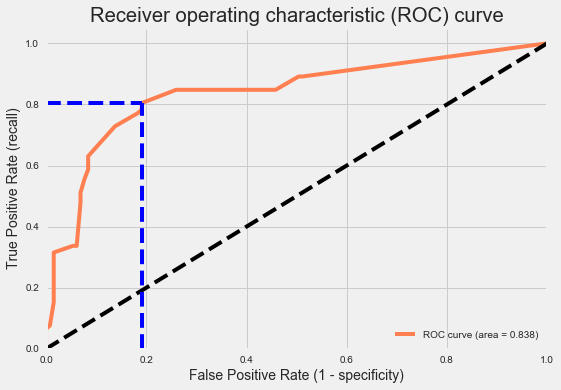

Using a threshold of 0.408 guarantees a sensitivity of 0.804 and a specificity of 0.809, i.e. a false positive rate of 19.08%.


In [83]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_train.drop(['Survived'], axis=1), final_train['Survived'], test_size = 0.25, random_state=2)

# check classification scores of logistic regression
logreg = LogisticRegression(max_iter=100, C=5)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.intercept_)
print(logreg.coef_)
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))


idx = np.min(np.where(tpr > 0.8)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

In [84]:
# create X (features) and y (response)
Selected_features = ['Pclass', 'Sex', 'Q', 'G', 'D', 'A', 'B', 'IsMinor', 'TravelAlone',
       'Family']
X =train[Selected_features]
y = train['Survived']

In [85]:
# 10-fold cross-validation logistic regression
logreg = LogisticRegression(C=5)
# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the data
# cv=10 for 10 folds
# scoring = {'accuracy', 'neg_log_loss', 'roc_auc'} for evaluation metric - although they are many
scores_accuracy = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, X, y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')
print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(logreg.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

K-fold cross-validation results:
LogisticRegression average accuracy is 0.805
LogisticRegression average log_loss is 0.443
LogisticRegression average auc is 0.859


In [86]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

modelCV = LogisticRegression()

results = cross_validate(modelCV, X, y, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
LogisticRegression average accuracy: 0.803 (+/-0.032)
LogisticRegression average log_loss: 0.442 (+/-0.044)
LogisticRegression average auc: 0.859 (+/-0.034)


In [87]:
# KNearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, X_train, y_train, cv=3)
knn_mean = knn_scores.mean()
print(knn_mean)

0.8023875893831051


In [ ]:
#Things to try
# 1.Grid Search for optimal value of C in Logistic Regression and K  in KNearestNeighbour
# 2.Different Feature Selection and Engineering Methods
# 3.Cross-Validation

**TRIALS**

In [ ]:


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop(['Survived', 'PassengerId'], axis=1), train['Survived'], test_size = 0.2, random_state=2)
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=10000, C=50)
logreg.fit(X_train, y_train)

#R-Squared Score
print("R-Squared for Train set: {:.3f}".format(logreg.score(X_train, y_train)))
print("R-Squared for test set: {:.3f}" .format(logreg.score(X_test, y_test)))
print(logreg.intercept_)
print(logreg.coef_)
Y_target = train["Survived"].values
#categorical variables:

categorical = train.dtypes[train.dtypes == "object"].index

print(categorical)
train[categorical].describe()


The categorical variable summary shows the count of non-NaN records, the number of unique categories, 
the most frequently occurring value and the number of occurrences of the most frequent value.

<B> Questions to consider </B>

Do I need all of the variables?

Should I transform any variables?

Are there NA values, outliers or other strange values?

Should I create new variables?


Features that describe data(passengers in this case) numerically or group them into a few broad categories could be useful for predicting.
The variables Pclass, Sex, Age, SibSp, Parch, Fare and Embarked appear to fit this description


Passenger ID is just a number assigned to each passenger. It is nothing more than an arbitrary identifier

In [ ]:
#Lets explore Name variable

sorted(train["Name"])[0:20]   # Check the first 20 sorted names


In [ ]:
#train["Name"].describe()


Name variable has 889 unique values. Since there are 889 rows in the data set we know each name is unique. 
It appears that married women have their maiden names listed in parentheses. 
In general, a categorical variable that is unique to each case isn't useful for prediction.


Name doesnt qualify for a variable to be used for predicting. It wil be used only for reporting final output

In [ ]:
#Lets explore "Ticket"

train["Ticket"][0:15]

In [ ]:
train["Ticket"].describe()

Ticket has 680 unique values: almost as many as there are passengers. 
Categorical variables with almost as many levels as there are records are generally not very useful for prediction. 

In [ ]:
#Lets explore Cabin

train["Cabin"][0:15]


In [ ]:
train["Cabin"].describe()  # Check number of unique cabins


Cabin also has 145 unique values, which indicates it may not be particularly useful for prediction. 
On the other hand, the names of the levels for the cabin variable seem to have a regular structure: each starts with a capital letter followed by a number. We could use that structure to reduce the number of levels to make categories large enough that they might be useful for prediction.

In [ ]:
train["Cabin"].unique()   # Check unique cabins


In [ ]:
char_cabin = train["Cabin"].astype(str) # Convert data to str

new_Cabin = np.array([cabin[0] for cabin in char_cabin]) # Take first letter

new_Cabin = pd.Categorical(new_Cabin)

new_Cabin.describe()


In [ ]:
train["Cabin"] = new_Cabin


In [ ]:
train["Cabin"].describe() 


In [ ]:
# No of passengers survived vs dead

train["Survived"].value_counts()

In [ ]:
# Proportion of passengers survived vs dead

train["Survived"].value_counts(normalize = True)

In [ ]:
# Absolute numbers of Survived male passengers by their Gender

train["Survived"][train["Sex"] == 'male'].value_counts()

In [ ]:
# Proportion of Survived male passengers by their Gender

train["Survived"][train["Sex"] == 'male'].value_counts(normalize=True)


In [ ]:
train.groupby(["Sex","Survived"]).size().unstack()

In [ ]:
train.pivot_table(index="Sex", values=["Survived"], aggfunc=np.mean)

In [ ]:
# Missing Values

train.apply(lambda x: sum(x.isnull()))

In cases where you have a lot of data and only a few missing values, it might make sense to simply delete records with missing values present. 
On the other hand, if you have more than a handful of missing values, removing records with missing values could cause you to get rid of a lot of data. 
Missing values in categorical data are not particularly troubling because you can simply treat NA as an additional category.
Missing values in numeric variables are more troublesome, since you can't just treat a missing value as number.

In [ ]:
train.hist(column='Age', figsize=(9,6), bins=20)  

In [ ]:
train["Age"] = train["Age"].fillna(train["Age"].median())

test["Age"] = test["Age"].fillna(test["Age"].median())

In [ ]:
train.hist(column='Age',    # Column to plot
                   figsize=(9,6),   # Plot size
                   bins=20)         # Number of histogram bins

In [ ]:
#Checking for Outliers

train["Fare"].plot(kind="box", figsize=(9,9))

In [ ]:
train['Embarked'].value_counts()

In [ ]:
#Impute the missing values with most common value

train["Embarked"] = train ["Embarked"].fillna("S")


test["Embarked"] = test["Embarked"].fillna("S")

In [ ]:
#Feature Engineering

train["Family"] = train["SibSp"] + train["Parch"]

In [ ]:
most_family = np.where(train["Family"] == max(train["Family"]))

train.iloc[most_family]

In [ ]:
#Convert the categorical variables into integers

train["Sex"][train["Sex"] == "male"] = 0
train["Sex"][train["Sex"] == "female"] = 1

test["Sex"][test["Sex"] == "male"] = 0
test["Sex"][test["Sex"] == "female"] = 1

In [ ]:
#Try One hot Encoding
train["Embarked"][train["Embarked"] == "S"] = 0
train["Embarked"][train["Embarked"] == "C"] = 1
train["Embarked"][train["Embarked"] == "Q"] = 2

test["Embarked"][test["Embarked"] == "S"] = 0
test["Embarked"][test["Embarked"] == "C"] = 1
test["Embarked"][test["Embarked"] == "Q"] = 2

In [ ]:
#Scaling the numerical data:
from sklearn.preprocessing import StandardScaler
#train_numerical_features = list(train.select_dtypes(include=['int64', 'float64', 'int32']).columns)
ss_scaler = StandardScaler()
#train_df_ss = pd.DataFrame(data = train)
train[[ "Age", "Fare"]] = ss_scaler.fit_transform(train[[ "Age", "Fare"]])


In [ ]:
train.head()

In [ ]:
train.Pclass.unique()

In [ ]:
train.info()

In [ ]:
train[["Pclass"]] = ss_scaler.fit_transform(train[["Pclass"]])

In [ ]:
train.head()

In [ ]:
# Using Logistic Regression

#Note that regularization is applied by default. default=’l2’

from sklearn.linear_model import LogisticRegression


Y_target = train["Survived"].values
X_features_one = train[["Pclass", "Sex", "Age", "Fare"]].values
                               
logistic_model = LogisticRegression()
logistic_model.fit(X_features_one, Y_target)

# Print the Models Coefficients
print(logistic_model.coef_)



In [ ]:
print(logistic_model.classes_)

In [ ]:
# Make predictions
y_preds = logistic_model.predict(X = X_features_one)

# Generate table of predictions vs actual
pd.crosstab(y_preds,train["Survived"])

In [ ]:
y_preds[0:10]

In [ ]:
from sklearn.metrics import log_loss
log_loss(y_true=train["Survived"],y_pred=y_preds)

In [ ]:
# Accuracy

logistic_model.score(X = X_features_one ,
                y = train["Survived"])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true=train["Survived"],y_pred=y_preds)

In [ ]:
from sklearn import metrics 

# View confusion matrix
metrics.confusion_matrix(y_true=train["Survived"],  # True labels
                         y_pred=y_preds) # Predicted labels

#in binary classification, the count of 
#true negatives is C00
#false negatives is C10
#true positives is C11
#false positives is C01
# TN FP
# FN TP


In [ ]:
metrics.precision_score(y_true=train["Survived"],  # True labels
                         y_pred=y_preds) # Predicted labels


In [ ]:
metrics.recall_score(y_true=train["Survived"],  # True labels
                         y_pred=y_preds) # Predicted labels


In [ ]:
#The F-beta score weights recall more than precision by a factor of beta.
#beta == 1.0 means recall and precision are equally important.
metrics.precision_recall_fscore_support(y_true=train["Survived"], y_pred=y_preds, beta=0.5)

# Confusion Matrix

In [ ]:
# View summary of common classification metrics
print(metrics.classification_report(y_true=train["Survived"],
                              y_pred=y_preds) )

In [ ]:
y_preds_prob = logistic_model.predict_proba(X = X_features_one)

In [ ]:
y_preds_prob[0:10]

In [ ]:
plt.hist(y_preds_prob, bins=8)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of 0 and 1')
plt.ylabel('Frequency')

In [ ]:
print(y_preds_prob[0:10])

#The first [.88, .11] in y_pred denotes 88% probability that the first 
#sample has label 0. The log loss is non-negative.

In [ ]:
train["Survived"][0:10]

In [ ]:
# store the predicted probabilities for class 1
y_pred_prob_survive = logistic_model.predict_proba(X = X_features_one)[:, 1]
logistic_model.classes_

In [ ]:
y_pred_prob_survive

In [ ]:
np.min(y_pred_prob_survive)

In [ ]:
#plt.hist(y_pred_prob_survive, bins=8)

# x-axis limit from 0 to 1
#plt.xlim(0,1)
#plt.title('Histogram of predicted probabilities')
#plt.xlabel('Predicted probability of survival')
#plt.ylabel('Frequency')

# ROC CURVE

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(train["Survived"],
                                         y_pred_prob_survive)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for survival classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [ ]:
print(thresholds)

In [ ]:
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [ ]:
evaluate_threshold(0.5)

In [ ]:
evaluate_threshold(0.3)

In [ ]:
from sklearn.preprocessing import binarize
# it will return 1 for all values above 0.3 and 0 otherwise

#y_pred_class = binarize(y_pred_prob_survive, 0.3)
y_pred_class = binarize(y_preds_prob, 0.9)



In [ ]:
y_pred_class

In [ ]:
y_pred_class[:,0]

In [ ]:
print(metrics.classification_report(y_true=train["Survived"],
                              y_pred=y_pred_class[:,1]) )

# AUC SCORE

In [ ]:
print(metrics.roc_auc_score(train["Survived"], y_pred_prob_survive))

# PRECISION RECALL CURVE

In [ ]:
# calculate precision-recall curve
precision, recall, thresholds = metrics.precision_recall_curve(train["Survived"],y_pred_prob_survive)




In [ ]:
plt.plot(recall, precision, marker='.')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('Recall-Precision curve for survival classifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
#plt.show()

# WHEN TO USE ROC & PRECISION-RECALL 
--> ROC curves should be used when there are roughly equal numbers of observations for each class.

--> Precision-Recall curves should be used when there is a moderate to large class imbalance.

In [ ]:
print(thresholds)